In [127]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
df = pd.read_csv('source.csv')

In [113]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [184]:
list = df.columns
list = list.values.tolist()
list[1:]
df.count()

Date         1989
Open         1989
High         1989
Low          1989
Close        1989
Volume       1989
Adj Close    1989
dtype: int64

## Mode

In [29]:
df.mode()['Date'][0]

'2008-08-08'

In [16]:
for name in list:
    print ("{} = {}".format(name, df.mode()[name][0]))

Date = 2008-08-08
Open = 9868.339844
High = 10061.660156
Low = 7840.450195
Close = 9509.280273
Volume = 76820000.0
Adj Close = 9509.280273


## Mean

In [57]:
df.mean()

Open         1.345912e+04
High         1.354130e+04
Low          1.337293e+04
Close        1.346303e+04
Volume       1.628110e+08
Adj Close    1.346303e+04
dtype: float64

## Median

In [58]:
df.median()

Open         1.302205e+04
High         1.308811e+04
Low          1.295313e+04
Close        1.302558e+04
Volume       1.351700e+08
Adj Close    1.302558e+04
dtype: float64

## Midrage

In [16]:
for name in list[1:]:
    midrage = df[name].min() + df[name].max() / 2
    print ("midrange of column {} = {}".format(name, midrage))

midrange of column Open = 15704.5400395
midrange of column High = 15885.289550500001
midrange of column Low = 15606.230468500002
midrange of column Close = 15703.245117499999
midrange of column Volume = 345870000.0
midrange of column Adj Close = 15703.245117499999


# Measuring the Dispersion of Data:

## Range:

In [47]:
df.iloc[:,1:].max() - df.iloc[:,1:].min()

Open         1.176805e+04
High         1.164175e+04
Low          1.180261e+04
Close        1.176534e+04
Volume       6.665100e+08
Adj Close    1.176534e+04
dtype: float64

## Quantiles:

In [25]:
df.quantile([.25, .5, .75, 1], axis = 0)

,Open,High,Low,Close,Volume,Adj Close
0.25,10907.339844,11000.980469,10824.759766,10913.379883,100000000.0,10913.379883
0.50,13022.049805,13088.110352,12953.129883,13025.580078,135170000.0,13025.580078
0.75,16477.699219,16550.070312,16392.769531,16478.410156,192600000.0,16478.410156
1.00,18315.060547,18351.359375,18272.560547,18312.390625,674920000.0,18312.390625


## Interquartile range (IQR):

In [58]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Q3 - Q1

Open         5.570359e+03
High         5.549090e+03
Low          5.568010e+03
Close        5.565030e+03
Volume       9.260000e+07
Adj Close    5.565030e+03
dtype: float64

## Boxplots:

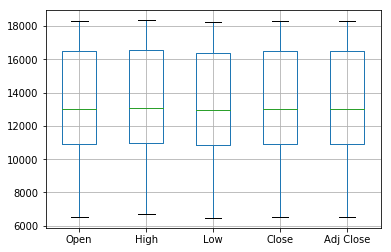

In [10]:
df.boxplot(column=['Open', 'High', 'Low', 'Close','Adj Close' ])

## boxplot description::  ## http://www.physics.csbsju.edu/stats/box2.html

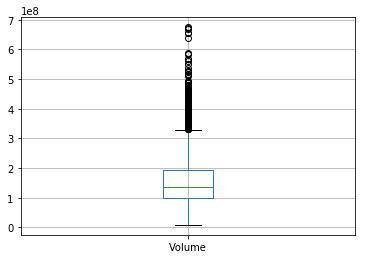

In [12]:
df.boxplot(column=['Volume'])

In [13]:
df['Volume'].value_counts()

76820000     3
103260000    3
158440000    2
76270000     2
62770000     2
113620000    2
85230000     2
107100000    2
67510000     2
143990000    2
123070000    2
116160000    2
177920000    2
135940000    2
128420000    2
99400000     2
141870000    2
134640000    2
131670000    2
75090000     2
119800000    2
145920000    2
165880000    2
126460000    2
131150000    2
89440000     2
168560000    2
90630000     2
114360000    2
190220000    2
            ..
584900000    1
73440000     1
149250000    1
118950000    1
308520000    1
195910000    1
79330000     1
52880000     1
319210000    1
114590000    1
73720000     1
95020000     1
142030000    1
85510000     1
106380000    1
207200000    1
94320000     1
126650000    1
128020000    1
103860000    1
65570000     1
87420000     1
192310000    1
64560000     1
231160000    1
260900000    1
121240000    1
100850000    1
450270000    1
126030000    1
Name: Volume, Length: 1897, dtype: int64

# Measures of data dispersion

## Variance

In [15]:
df.var()

Open         9.880219e+06
High         9.836200e+06
Low          9.925152e+06
Close        9.884780e+06
Volume       8.821610e+15
Adj Close    9.884780e+06
dtype: float64

##  Standard Deviation

In [16]:
df.std()

Open         3.143282e+03
High         3.136272e+03
Low          3.150421e+03
Close        3.144007e+03
Volume       9.392343e+07
Adj Close    3.144007e+03
dtype: float64

## Graphic Displays of Basic Statistical Descriptions of Data (2.2)

## Quantile–quantile plots

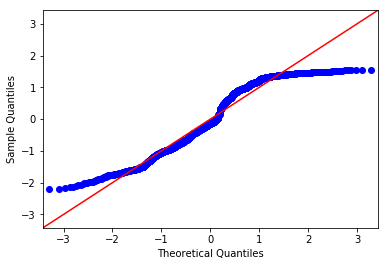

In [146]:
qqplot = sm.qqplot(df['Open'], fit=True, line='45')

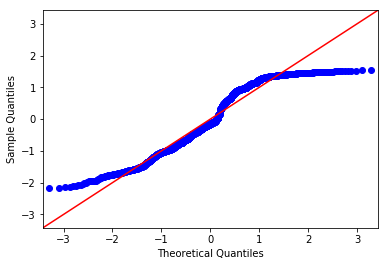

In [147]:
qqplot=sm.qqplot(df['High'], fit=True, line='45')

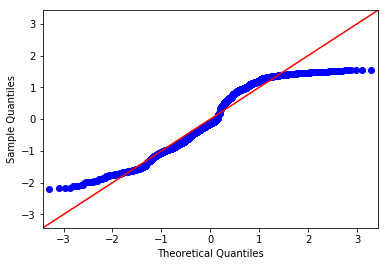

In [148]:
qqplot=sm.qqplot(df['Low'], fit=True, line='45')

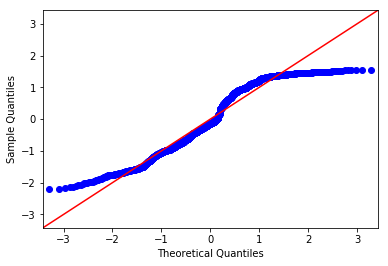

In [149]:
qqplot= sm.qqplot(df['Close'], fit=True, line='45')

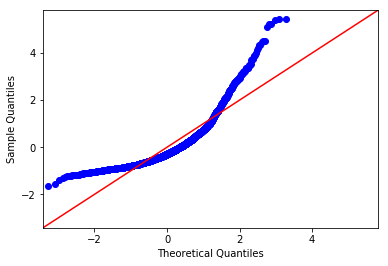

In [189]:
qqplot= sm.qqplot(df['Volume'], fit=True, line='45')

## Instagram

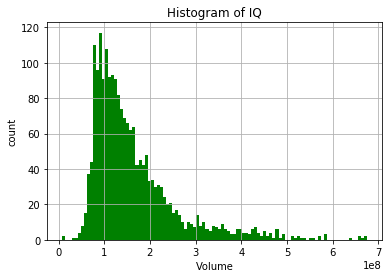

In [196]:
n, bins, patches = plt.hist(df['Volume'], bins=100, density=False, facecolor='g')
plt.xlabel('Volume')
plt.ylabel('count')
plt.title('Histogram of IQ')
plt.grid(True)
# plt.show()